## Randall Mencias
## Juan Francisco Cisneros
## Josue Cardenas

### DESCRIPCION DEL PROYECTO
- ....

### LIBRERIAS

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### ANALISIS EXPLORATORIO DE DATOS

#### CARGA DE DATOS

In [29]:
# Where data is stored
pathTest = "../resources/drugsComTest_raw.csv"
pathTrain = "../resources/drugsComTrain_raw.csv"

# Read data
dfTest = pd.read_csv(pathTest)
dfTrain = pd.read_csv(pathTrain)


In [30]:
dfTest.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [31]:
dfTrain.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


#### Plot Columns

In [32]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)
print()
print("Test data columns: ", dfTest.columns)
print("Train data columns: ", dfTrain.columns)

Test data shape, Rows and Columns:  (53766, 7)
Train data shape, Rows and Columns:  (161297, 7)

Test data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Train data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [33]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [34]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [35]:
dfTrain.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [36]:
# Check for missing values
dfTrain.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [37]:
dfTest.describe()

,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [38]:
dfTest.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### Plot Columns

In [39]:
# Raitings distribution
dfTrain['rating'].value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in train data'}, xlabel='Rating', ylabel='Count'>

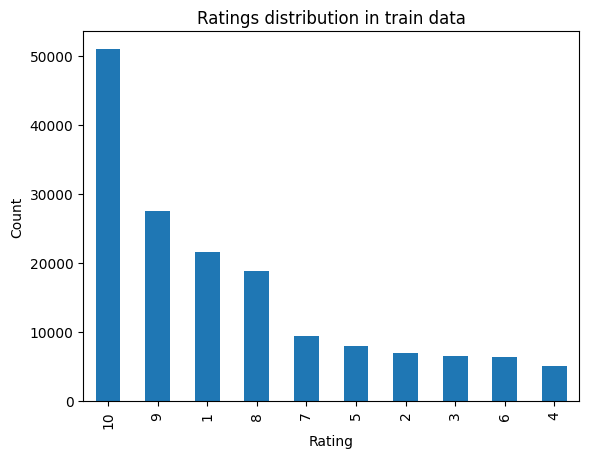

In [40]:
dfTrain['rating'].value_counts().plot(kind='bar', title='Ratings distribution in train data',xlabel='Rating', ylabel='Count')


In [41]:
dfTest['rating'].value_counts()

10    17016
9      9177
1      7299
8      6156
7      3091
5      2710
2      2334
3      2205
6      2119
4      1659
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in test data'}, xlabel='Rating', ylabel='Count'>

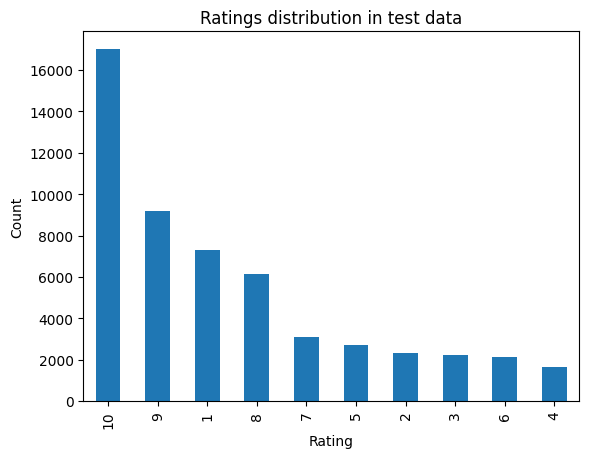

In [42]:
dfTest['rating'].value_counts().plot(kind='bar', title='Ratings distribution in test data',xlabel='Rating', ylabel='Count')

#### Matrix Correlation

In [43]:
# Plot Correlation Matrix
corr = dfTrain.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_2088/2031966965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTrain.corr()


,uniqueID,rating,usefulCount
uniqueID,1.000000,0.015185,0.016475
rating,0.015185,1.000000,0.234185
usefulCount,0.016475,0.234185,1.000000


In [44]:
corr = dfTest.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_2088/1667596228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTest.corr()


,uniqueID,rating,usefulCount
uniqueID,1.000000,0.019804,0.020867
rating,0.019804,1.000000,0.236897
usefulCount,0.020867,0.236897,1.000000


As we can see, there is a strong correlation between the variables, which is expected since they are all related to the same topic.

#### Drug Name Label Encoding

In [45]:
drugName = dfTrain['drugName'].value_counts()
drugName

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

In [46]:
# Transform DrugName to a categorical variable, save the categories and the number of categories
dfTrain['drugName'] = dfTrain['drugName'].astype('category')
# Save the categories in between drugname and condition
dfTrain['drugName_cat'] = dfTrain['drugName'].cat.codes
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,3203
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1431
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1854
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2285
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,516
...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,555
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,1976
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,2279
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,3028


In [47]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['drugName_cat'].nunique())

Number of categories in train data:  3436


In [48]:
# Show DrugName and its unique DrugName_cat
dfTrain[['drugName', 'drugName_cat']].drop_duplicates().sort_values('drugName_cat')

,drugName,drugName_cat
9892,A + D Cracked Skin Relief,0
18402,A / B Otic,1
3219,Abacavir / dolutegravir / lamivudine,2
40360,Abacavir / lamivudine / zidovudine,3
18421,Abatacept,4
...,...,...
1060,Zyvox,3431
50955,ZzzQuil,3432
59226,depo-subQ provera 104,3433
866,ella,3434


<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

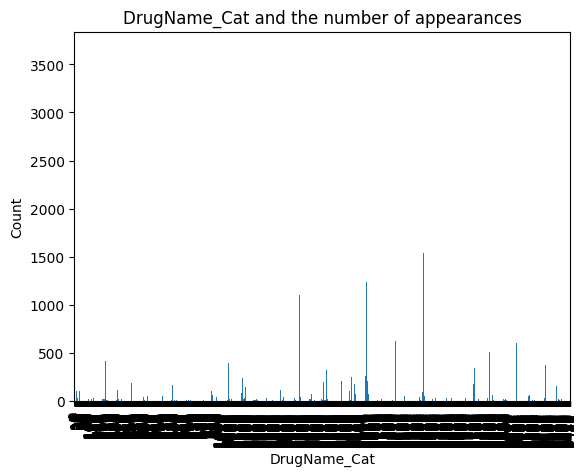

In [56]:
# in a graph, plot the DrugName_Cat and the number of appearances
drugNameCat = dfTrain['drugName_cat'].value_counts().sort_index()
# graph only the first 20 categories
drugNameCat.plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')


In [59]:
# having the drugName_cat from the train data, we can now use it in the test data
dfTest['drugName_cat'] = dfTest['drugName'].astype('category')
dfTest['drugName_cat'] = dfTest['drugName_cat'].cat.codes
dfTest

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1561
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1489
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,294
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,593
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,622
...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,2265
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,885
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,1349
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,2268


<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

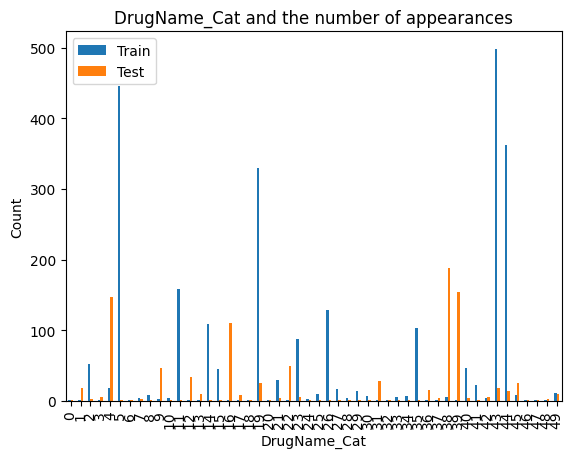

In [64]:
# Compare the count of DrugName_cat in train and test data in a graph
drugNameCatTrain = dfTrain['drugName_cat'].value_counts().sort_index()
drugNameCatTest = dfTest['drugName_cat'].value_counts().sort_index()
# in the same graph, plot the DrugName_Cat and the number of appearances of train and test data
drugNamesCat = pd.concat([drugNameCatTrain, drugNameCatTest], axis=1)
drugNamesCat.columns = ['Train', 'Test']
drugNamesCat[0:50].plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')

#### Condition Label Encoding

In [65]:
conditionName = dfTrain['condition'].value_counts()
conditionName

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [66]:
# Transform Condition to a categorical variable, save the categories and the number of categories
dfTrain['condition'] = dfTrain['condition'].astype('category')
# Save the categories in between drugname and condition
dfTrain['condition_cat'] = dfTrain['condition'].cat.codes
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,3203,466
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1431,73
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1854,165
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2285,165
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,516,574
...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,555,92
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,1976,534
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,2279,701
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,3028,812


In [67]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['condition_cat'].nunique())

Number of categories in train data:  885


In [69]:
# Show Condition and its unique Condition_cat
# Delete Nan
dfTrain = dfTrain.dropna()
dfTrain[['condition', 'condition_cat']].drop_duplicates().sort_values('condition_cat')

,condition,condition_cat
516,0</span> users found this comment helpful.,0
10643,10</span> users found this comment helpful.,1
31343,110</span> users found this comment helpful.,2
391,11</span> users found this comment helpful.,3
139106,121</span> users found this comment helpful.,4
...,...,...
98503,unctional Gastric Disorde,879
139121,ungal Infection Prophylaxis,880
156773,ungal Pneumonia,881
30597,von Willebrand's Disease,882
